# M40006 In-Course Assessment

# 23 March 2022, 11 am - 1 pm

## Two Hours

### Answer all questions, submitting your answers as a single Jupyter notebook.

To carry out this assignment, you may find useful:
<ul>
    <li>the core Python <code>print</code>, <code>range</code>, <code>list</code>, <code>zip</code> and <code>dict</code> functions;</li>
    <li>the functions <code>linspace</code>, <code>arange</code>, <code>meshgrid</code>, <code>ones</code> and <code>zeros</code> from the <code>numpy</code> module;</li> 
    <li>the functions <code>symbols</code>, <code>solve</code>, <code>Eq</code>, <code>diff</code>, <code>re</code>, <code>im</code>, <code>lambdify</code> and <code>expand</code> from the <code>sympy</code> module;</li> 
    <li>the function <code>Series</code> from the <code>pandas</code> module;</li> 
    <li>the functions <code>imshow</code>, <code>contour</code> and <code>axis</code> from the <code>pyplot</code> module of <code>matplotlib</code>.
</ul>

<b>Important</b>: the above is not an exhaustive list, and you may wish to import other functions or other modules.

It is recommended that you simply execute the following code cell:

In [3]:
import numpy as np
import sympy as sp
import pandas as pd
sp.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1 (25 marks)

The following code cells contain code listings for two functions, `lcm1` and `lcm2`, each of which calculates the lowest common multiple of `a` and `b` (which can be assumed to be positive integers with $a\ge b$).

In [2]:
def lcm1(a, b):
    """
    Returns the lowest common multiple of a and b
    """
    # initial values of a and b
    a0, b0 = a, b
    
    # loop while a and b are not equal
    while a != b:
        # if a is the smaller, add a0 to a
        if a < b:
            a += a0
        # otherwise, add b0 to b
        else:
            b += b0
    
    # when a and b are equal, return a
    return a

In [3]:
def lcm2(a, b):
    """
    Returns the lowest common multiple of a and b
    """
    # initial values of a and b
    a0, b0 = a, b
    
    # loop: Euclid's algorithm to find gcd
    while b>0:
        
        # replace a with b; replace b with a mod b
        a, b = b, a%b
    
    # return product of original numbers divided by gcd
    return (a0*b0)//a

(a) Test both functions on suitable positive integer arguments; make sure you perform several tests, and that you test a variety of cases. Display your testing code and your test results.

In [4]:
### BEGIN SOLUTION
# coprime integers, small
print(lcm1(5,3), lcm2(5,3))
# non-coprime integers, small
print(lcm1(35,21), lcm2(35,21))
# edge cases
print(lcm1(35,1), lcm2(35,1))
print(lcm1(35,35), lcm2(35,35))
print(lcm1(1,1), lcm2(1,1))
# larger integers
print(lcm1(2**10*(2**7-1),2**7*(2**10-1)), lcm2(2**10*(2**7-1),2**7*(2**10-1)), 2**10*(2**10-1)*(2**7-1))


# 4 marks
# Award part marks at your discretion
# For full marks, the testing should include at least one coprime pair,
# at least one non-coprime pair and at least two of the "edge cases" above

### END SOLUTION

15 15
105 105
35 35
35 35
1 1
133039104 133039104 133039104


(b) In the case of `lcm1`, we define the <b>comparison count</b> as the number of times the program tests whether $a \ne b$. By adding suitable lines to the code, find the comparison count during the calculation of the lowest common multiple of $5824280$ and $3599603$.

In [5]:
def lcm1(a, b):
    ### BEGIN SOLUTION
    """
    Returns the lowest common multiple of a and b
    """
    # initial values of a and b
    a0, b0 = a, b
    
    comparison_count = 1
    
    # loop while a and b are not equal
    while a != b:
        # if a is the smaller, add a0 to a
        if a < b:
            a += a0
        # otherwise, add b0 to b
        else:
            b += b0
        comparison_count += 1
    
    # when a and b are equal, return a
    return a, comparison_count
lcm1(5824280,3599603)

# 3 marks
# Accept any valid solution
# Penalise off-by-one by deducting one mark
### END SOLUTION

(c) In the case of `lcm2`, we define the <b>comparison count</b> as the number of times the program tests whether $b>0$. By adding lines to the code, find the comparison count during the calculation of the lowest common multiple of $5824280$ and $3599603$.

In [6]:
def lcm2(a, b):
    ### BEGIN SOLUTION
    """
    Returns the lowest common multiple of a and b
    """
    # initial values of a and b
    a0, b0 = a, b
    
    # comparison count
    comparison_count = 1
    
    # loop: Euclid's algorithm to find gcd
    while b>0:
        
        # replace a with b; replace b with a mod b
        a, b = b, a%b
        
        comparison_count += 1
    
    # return product of original numbers divided by gcd
    return (a0*b0)//a, comparison_count
lcm2(5824280,3599603)

# 3 marks
# Accept any valid solution
# Penalise off-by-one by deducting one mark
### END SOLUTION

(d) Write suitable code to show that if $a=89$ and $b<a$, the highest comparison count for `lcm1` corresponds to $b=88$.

In [7]:
### BEGIN SOLUTION
counts=[lcm1(89,b)[1] for b in range(1,89)]
[counts.index(max(counts))+1,max(counts)]

# 3 marks
# Accept any valid solution
### END SOLUTION

(e) Given that $b<a$ and that $a$ and $b$ are coprime, write down the comparison count for `lcm1` in terms of $a$ and $b$. 

Also, write down the comparison count in terms of $a$ and $b$ if $a$ and $b$ are <em>not</em> necessarily coprime, briefly explaining your reasoning.

Comparison count is $a+b-1$.

The comparison count is not changed if $a$ and $b$ are multiplied or divided by a constant, so in general it's $(a+b)/\gcd(a,b)-1$.

<b>3 marks: 1 for each answer and 1 for suitable brief argument</b>

(f) Given that $b<a$, describe the dependence on $a$ of the worst-case comparison count for `lcm1` using "big $O$" notation, briefly justifying your answer.

Worst case is $2a-1$, and therefore the algorithm is $O(a)$.

<b>2 marks: 1 for correct answer, 1 for suitable brief argument</b>

(g) Given that $a=89$ and $b<a$, write code to find the value of $b$ that corresponds to the highest comparison count for `lcm2`. (You may assume that this value is unique.)

In [9]:
### BEGIN SOLUTION
counts=[lcm2(89,b)[1] for b in range(1,89)]
[counts.index(max(counts))+1,max(counts)]

# 3 marks
# Accept any valid solution
### END SOLUTION

(h) It can be shown that the worst case behaviour of `lcm2` occurs when $b$ and $a$ are successive Fibonacci numbers; specifically: 

<ul>
    <li>if $a$ is the $m$th Fibonacci number and $b<a$, then the highest comparison count $M_a$ is attained if $b$ is the $(m-1)$th Fibonacci number;</li>
    <li>if $a$ is less than the $m$th Fibonacci number, then it is guaranteed that the comparison count will be less than $M_a$.</li>
</ul>

It can also be shown that $M_a = m-k$, where $k$ is a constant.

Given that $b<a$, describe the dependence on $a$ of the worst-case comparison count for `lcm2` using "big $O$" notation, briefly justifying your answer.

You may assume that the $m$th Fibonacci number, $F_m$, is given asymptotically by

$$F_m \approx \frac{1}{\sqrt{5}}\left(\frac{1+\sqrt{5}}{2}\right)^m.$$

Worst case behaviour is when $a \approx \phi^m$, and is equal to $m-k$; that is $\log a/\log \phi-k$. The algorithm is therefore $O(\log a)$.

<b>4 marks: 1 for correct answer, 3 for suitable argument; award part marks at your discretion for incomplete or slightly incorrect arguments</b>

# Question 2 (25 marks)

This question is concerned with iterating the complex function

$$f(z) = z^2 + c.$$

If, at any point in the sequence $z_0$, $z_1$, $z_2$, $\dots$, where $z_{n+1} = f(z_n)$, the absolute value of $z_i$ is greater than or equal to $2$, this sequence is guaranteed to diverge; we will call the number of iterations necessary to get to this point, for particular values of $z_0$ and $c$, the <b>escape time</b>.

(a) Define `xrange` and `yrange` as 1-dimensional NumPy arrays of floats between $-1.5$ and $1.5$ inclusive, each containing 200 elements.

Using a suitable NumPy function, define `xvals` and `yvals` as $200\times200$ arrays of floats representing, respectively, the $x$- and $y$-coordinates of points on the lattice defined by `xrange` and `yrange`.

Finally, define `zvals` as a $200\times200$ array of complexes representing the corresponding points in the Argand diagram.

In [8]:
### BEGIN SOLUTION
xrange = np.linspace(-1.5,1.5,200)
yrange = np.linspace(-1.5,1.5,200)
xvals, yvals = np.meshgrid(xrange, yrange)
zvals = xvals + yvals*1j

# 4 marks: award part marks at your discretion
### END SOLUTION

(b) Define `escape_time` as a $200\times200$ NumPy array, each of whose elements is the float $-1.0$.

Then, write some code that does the following. 

For each element of `escape_time`, if that element currently has the value $-1.0$ and if the element of `zvals` in the same position has already escaped (that is, has an absolute value greater than or equal to 2), then the value of the element of `escape_time` should be set to $0.0$.

(So: for $0\le i < 200$, $0\le j < 200$, if the $(i,j)$ element of `escape_time` is currently $-1.0$, and the $(i,j)$ element of `zvals` has absolute value greater than or equal to 2, then the $(i,j)$ element of `escape_time` should become $0.0$.) 

<b>IMPORTANT</b>: For full marks, do this using a <b>logical array</b>. 

If you've done it right, the command
```python
plt.imshow(escape_time, extent=[-1.5,1.5,-1.5,1.5])
```
should show, in different colours, the interior and exterior of a circular disc of radius 2 (though remember your window size is only $-1.5\le x \le 1.5$, $-1.5 \le y \le 1.5$).

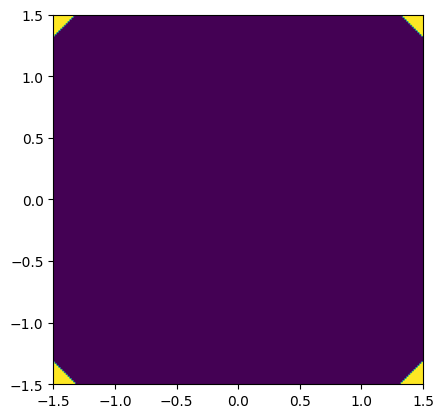

In [9]:
### BEGIN SOLUTION
escape_time = -np.ones((200,200))
escape_time[(escape_time==-1.0)&(abs(zvals)>=2)] = 0.0

# 4 marks
### END SOLUTION
plt.imshow(escape_time, extent=[-1.5,1.5,-1.5,1.5])

The following code first sets up an array `c` of complex numbers, identical to the initial value of `zvals`. It then takes those elements of `zvals` corresponding to elements of `escape_time` that are still equal to $-1.0$, and <em>for those elements alone</em>, and the corresponding elements of `c`, sets $z$ equal to $z^2+c$.

In [10]:
c = xvals+yvals*1j
logical_array = (escape_time==-1.0)
zvals[logical_array] = zvals[logical_array]**2+c[logical_array]

(c) Execute this code, and then set the value $1.0$ to all those elements of `escape_time` that are currently equal to $-1.0$ and whose position in the array corresponds to elements of `zvals` with an absolute value of 2 or more. (Again, for full marks, you should use a logical array.) 

Plot the resulting value of `escape_time` using `imshow`, in the same way as above.

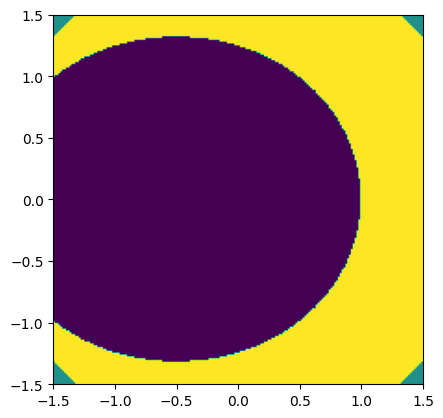

In [11]:
### BEGIN SOLUTION
escape_time[(escape_time==-1.0)&(abs(zvals)>=2)] = 1.0

# 4 marks
### END SOLUTION
plt.imshow(escape_time, extent=[-1.5,1.5,-1.5,1.5])

(d) Write a function called `escapeTime` which takes as its arguments
<ul>
    <li><code>c</code>, assumed to be a 2D NumPy array of complexes;</li>
    <li><code>z0</code>, assumed to be a 2D NumPy array of complexes with the same shape (same number of rows, same number of columns) as <code>c</code>;</li>
    <li><code>max_iterations</code>, assumed to be a non-negative int.</li>
</ul>

It should then, for each element of `z0` and the corresponding element of `c`, iterate the function $f(z) = z^2+c$, stopping the iteration when $|z| \ge 2$ or when `max_iterations` has been attained.

Finally, it should return a 2D NumPy array of floats, with the same shape as `z0`. 

Each float in the array should be the escape time for the corresponding elements of `z0` and `c`: that is, the number of iterations that were necessary for $|z|$ to become greater than or equal to $2$. 

In positions where $|z|$ fails to become greater than or equal to $2$, the value `max_iterations` should be set.

The code you wrote in the above sections should help you here; for full marks, and for maximum efficiency, you should aim to use logical arrays where possible.

In [12]:
def escapeTime(c, z0, max_iterations):
    ### BEGIN SOLUTION
    """
    Calculates the number of iterations of z = z**2 + c that are
    necessary in order for abs(z) to be 2 or more, for each value
    of z0 and the corresponding value of c
    """
    
    # initialize array, setting all elements to -1 
    e_t = -np.ones(np.shape(c))
    
    # loop
    for r in range(max_iterations):
        # if element of e_t is still -1 and abs(z) >= 2, set element to r
        e_t[(abs(z0)>=2)&(e_t == -1.0)] = r
        
        # if element ofg e_t is still -1, iterate z = z**2 + c
        logical_array = (e_t == -1.0)
        z0[logical_array] = z0[logical_array]**2 + c[logical_array]
    
    # where iteration has not escaped, set element of e_t to max_iterations
    e_t[e_t == -1.0] = max_iterations
    
    # return 
    return e_t  
# 7 marks
# If iteration through the array has been used instead of logical arrays and filtering,
# award up to a maximum of 5 marks
    ### END SOLUTION

(e) Test your function with `z0` and `c` both set to `xvals+yvals*1j` and `max_iterations` set to 100, calling your output `e_t`.

Using `imshow`, plot not `e_t` but `np.log(e_t+1)` (this works a little better).

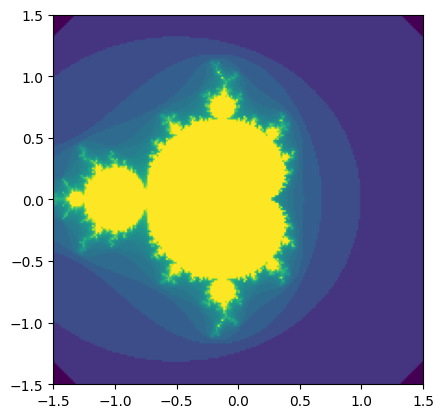

In [13]:
### BEGIN SOLUTION
e_t = escapeTime(xvals+yvals*1j,xvals+yvals*1j,100)
# 3 marks
### END SOLUTION
plt.imshow(np.log(e_t+1), extent=[-1.5,1.5,-1.5,1.5])

(f) Repeat, with the same values of `z0` and `max_iterations`, but with `c` set, this time, to a $200\times200$ array each of whose elements is the complex number $0.5+0.5i$.

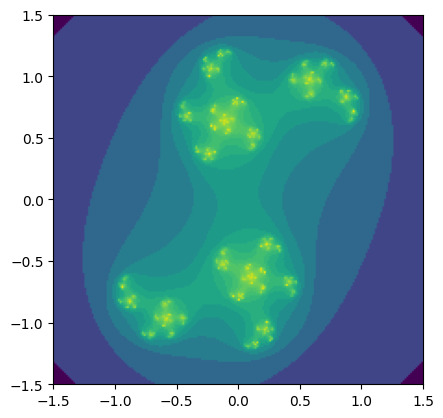

In [14]:
### BEGIN SOLUTION
e_t = escapeTime((0.5+0.5j)*np.ones((200,200)),xvals+yvals*1j,100)
# 3 marks
### END SOLUTION
plt.imshow(np.log(e_t+1), extent=[-1.5,1.5,-1.5,1.5])

# Question 3 (25 marks)

This question also concerns iterations of the function $f(z) = z^2+c$, where $c=a+i\,b$.

The following code sets up `z` as a SymPy variable, and `a` and `b` as <em>real</em> SymPy variables.

In [16]:
z = sp.symbols('z')
a, b = sp.symbols('a b',real=True)

(a) Set `f` equal to the symbolic expression `z**2 + a + b*sp.I`, and use SymPy to find the fixed points of `f` by solving symbolically, for `z`, the equation
$$z^2+a+i\,b=z.$$
Set the variable `sols1` equal to your list of solutions.

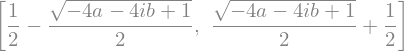

In [17]:
### BEGIN SOLUTION
f = z**2 + a + b*sp.I
sols1 = sp.solve(sp.Eq(f,z),z)

# 2 marks
### END SOLUTION
sols1

We now want to characterise those fixed points for which the absolute value of the derivative is exactly 1; those will correspond to the boundary of the region within which the fixed point is stable.

(b) Calculate the derivative of `f` with respect to `z`, setting the variable `df` equal to this symbolic expression.

In [18]:
### BEGIN SOLUTION
df = sp.diff(f,z)

# 1 mark
### END SOLUTION
df

(c) Using the SymPy functions `re` and `im`, and a Python comprehension, calculate the symbolic value of $\left({\rm Re}(f'(z))\right)^2+\left({\rm Im}(f'(z))\right)^2$ for each value of $z$ in `sols1`. Set the variable `abs_squared1` equal to this list of symbolic values.

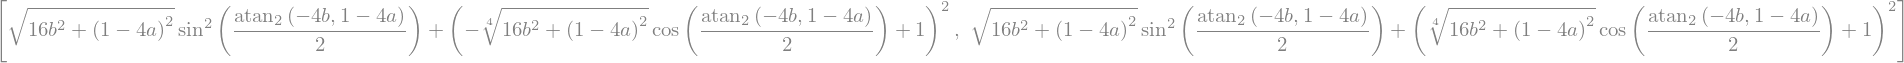

In [19]:
### BEGIN SOLUTION
abs_squared1 = [sp.re(df.subs(z,sol))**2+sp.im(df.subs(z,sol))**2 for sol in sols1]

# 2 marks
### END SOLUTION
abs_squared1

(d) Using `lambdify`, set `abs_squared1_f0` equal to the function that maps $a$ and $b$ to the first expression in the list `abs_squared1`; make sure that this function works across NumPy arrays.

Repeat, this time using the second expression in `abs_squared1`, and calling your function `abs_squared_f1`.

In [20]:
### BEGIN SOLUTION
abs_squared1_f0 = sp.lambdify((a, b), abs_squared1[0], 'numpy')
abs_squared1_f1 = sp.lambdify((a, b), abs_squared1[1], 'numpy')

# 3 marks
### END SOLUTION

(e) Using `pyplot`, generate a contour plot of `abs_squared_f0(x,y)`, using the values of `xvals` and `yvals` from Question 2. The plot should show only the contour with value 1. 

On the same pair of axes, show a contour plot of `abs_squared_f1(x,y)`, using the values of `xvals` and `yvals` from Question 2. Again, the plot should show only the contour with value 1. 

Make the scales on both axes equal.

(You may find that one of the contour plots is empty; this is expected. If they're both empty, though, something's wrong.)

<ipython-input-21-bb08278955ba>:3: UserWarning: No contour levels were found within the data range.
  plt.contour(xvals, yvals, abs_squared1_f1(xvals, yvals), [1])


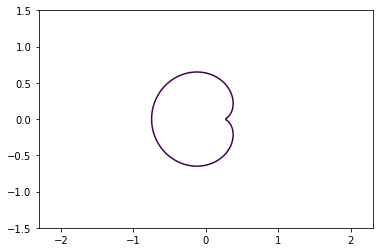

In [21]:
### BEGIN SOLUTION
plt.contour(xvals, yvals, abs_squared1_f0(xvals, yvals), [1])
plt.contour(xvals, yvals, abs_squared1_f1(xvals, yvals), [1])
plt.axis('equal')

# 4 marks
### END SOLUTION

(f) Using SymPy, find an <em>expanded</em> expression in terms of $z$, $a$ and $b$ for the composite function $f\circ f$; that is, $(z^2+a+i\,b)^2+a+i\,b$. Set the variable `f2` equal to this.

In [22]:
### BEGIN SOLUTION
f2 = sp.expand(f.subs(z,f))

# 3 marks
# Accept anything valid, including typing from scratch
# Deduct 1 mark if expression is not expanded, or has been expanded by hand
### END SOLUTION
f2

(g) Create a contour plot like that in part (e), showing the fixed points of the composite function $f\circ f$ for which the absolute value of the derivative of $f \circ f$ is exactly 1.

<ipython-input-23-7c77d8e7459c>:12: UserWarning: No contour levels were found within the data range.
  plt.contour(xvals, yvals, abs_squared2_f3(xvals, yvals), [1])


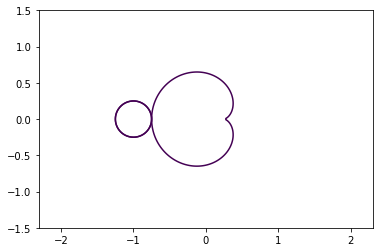

In [23]:
### BEGIN SOLUTION
sols2 = sp.solve(sp.Eq(f2,z),z)
df2 = sp.diff(f2,z)
abs_squared2 = [sp.re(df2.subs(z,sol))**2+sp.im(df2.subs(z,sol))**2 for sol in sols2]
abs_squared2_f0 = sp.lambdify((a, b), abs_squared2[0], 'numpy')
abs_squared2_f1 = sp.lambdify((a, b), abs_squared2[1], 'numpy')
abs_squared2_f2 = sp.lambdify((a, b), abs_squared2[2], 'numpy')
abs_squared2_f3 = sp.lambdify((a, b), abs_squared2[3], 'numpy')
plt.contour(xvals, yvals, abs_squared2_f0(xvals, yvals), [1])
plt.contour(xvals, yvals, abs_squared2_f1(xvals, yvals), [1])
plt.contour(xvals, yvals, abs_squared2_f2(xvals, yvals), [1])
plt.contour(xvals, yvals, abs_squared2_f3(xvals, yvals), [1])
plt.axis('equal')

# 8 marks
# Award part marks at your discretion
### END SOLUTION

(h) Comment briefly on the relationship between this diagram and the one in your answer to Question 2 part (e).

These curves form part of the boundary of the "never diverges" set in that question.

<b>1 mark. Accept anything along the right lines; be quite tolerant of vagueness here, as the precise answer is beyond their Dynamics knowledge.</b>

# Question 4 (25 marks)
This question makes use of the data file `words.dat`, which you should have downloaded into the same folder as your Jupyter notebook. You can read it in as a list using the code

In [24]:
fo = open("words.dat", "r")
words = fo.read().splitlines()
fo.close()

The data consists of an alphabetical list of English words. This question is about creating a word substitution code: this is a form of secret communication in which whole words are swapped for whole words, instead of letters being swapped for letters.

(a) Display the first ten elements of the list `words`.

In [25]:
### BEGIN SOLUTION
print(words[:10])

# 1 mark
### END SOLUTION

['a', 'aah', 'aardvark', 'aardvarks', 'abaci', 'aback', 'abacus', 'abacuses', 'abaft', 'abalone']


(b) Write some code to create a list called `code_words` which consists of the words in `words`, randomly shuffled. You may use any suitable function from the `random` module or the `numpy.random` submodule. Make sure that the list `words` is not itself shuffled; it must stay the same, and `code_words` must be a separate list.

Display the first ten elements of `code_words`

In [26]:
### BEGIN SOLUTION
from copy import copy
from random import shuffle
code_words = copy(words)
shuffle(code_words)
print(code_words[:10])

# 4 marks
# Be on the lookout for things like code_words = words; they should know to use copy,
# or to re-import words.dat, or something equivalent
# On the other hand, an error like that will have a big knock-on effect below, so only
# deduct 2 marks for it here
### END SOLUTION

['photochemistry', 'gesundheit', 'irrationals', 'pavilion', 'vulgar', 'barfly', 'recrossed', 'sequestrations', 'dodgiest', 'fury']


(c) Create a list of tuples `code_pairs` from `words` and `code_words`; the first element in each tuple should be an element of `words`, and the second should be the corresponding element of `code_words`.

Display the first ten elements of `code_pairs`.

In [27]:
### BEGIN SOLUTION
code_pairs = list(zip(words,code_words))
print(code_pairs[:10])

# 2 marks
### END SOLUTION

[('a', 'photochemistry'), ('aah', 'gesundheit'), ('aardvark', 'irrationals'), ('aardvarks', 'pavilion'), ('abaci', 'vulgar'), ('aback', 'barfly'), ('abacus', 'recrossed'), ('abacuses', 'sequestrations'), ('abaft', 'dodgiest'), ('abalone', 'fury')]


(d) Create a dictionary `code_dict` from `code_pairs`, and a Pandas series `code_series` from `code_dict`. 

Show the first ten rows of your series: the index should consist of `words` and the associated values should consist of `code_words`.

In [28]:
### BEGIN SOLUTION
code_dict = dict(code_pairs)
code_series = pd.Series(code_dict)
code_series.head(10)

# 3 marks
### END SOLUTION

a            photochemistry
aah              gesundheit
aardvark        irrationals
aardvarks          pavilion
abaci                vulgar
aback                barfly
abacus            recrossed
abacuses     sequestrations
abaft              dodgiest
abalone                fury
dtype: object

(e) Using your dictionary, and whatever string functions and methods you need, create a sentence `codetext` in which every word in the string

In [29]:
plaintext = 'there is a mole right at the top of the circus'

has been replaced by its associated code word.

In [30]:
### BEGIN SOLUTION
codetext = ' '.join([code_dict[word] for word in plaintext.split()])
# 2 marks
### END SOLUTION
print(codetext)

safetied doge photochemistry masonry fortress flanneling testiest loudhailers broadsheet testiest procurable


(f) Repeat using your Pandas series instead.

In [31]:
### BEGIN SOLUTION
codetext = ' '.join([code_series[word] for word in plaintext.split()])
# 2 marks
### END SOLUTION
print(codetext)

safetied doge photochemistry masonry fortress flanneling testiest loudhailers broadsheet testiest procurable


(g) Write some code to <em>decode</em> the above string; that is to recover the original plaintext. You should play the role of someone who doesn't know the plaintext, but you can assume that you have in your possession both `words` and `code_words`, as well as any lists, dictionaries or Pandas series built from them above.

In [32]:
### BEGIN SOLUTION
decode_pairs = [pair[::-1] for pair in code_pairs]
decode_pairs.sort()
decode_dict = dict(decode_pairs)
decrypt = ' '.join([decode_dict[word] for word in codetext.split()])
print(decrypt)
# 4 marks
# Accept anything valid.
### END SOLUTION

there is a mole right at the top of the circus


(h) Write and test a function called `pair_partner` which should take two arguments, `pairs` and `key`.

The argument `pairs` should consist of a list of 2-tuples, the first elements of which (that is, the elements with index zero) can be assumed to be strings in alphabetical order. So, for example, `pairs` might be 
```
[('a', 'turquoise'), ('aah', 'misreading'), ('aardvark', 'scoopfuls'), ('aardvarks', 'coexistence'), ('abaci', 'obediently'), ('aback', 'globetrotter'), ('abacus', 'constellations'), ('abacuses', 'needful'), ('abaft', 'heterogeneity'), ('abalone', 'selenium')]
```

The argument `key` should consist of a string, which can be assumed to be one of the first elements of the tuples in `pairs`. So, for example, `key` might be `'aardvarks'`.

The function should then return the corresponding <em>second</em> element, which in this case would be `'coexistence'`.

That is, the code
```python
test_pairs = [('a', 'turquoise'), ('aah', 'misreading'), ('aardvark', 'scoopfuls'), ('aardvarks', 'coexistence'), ('abaci', 'obediently'), ('aback', 'globetrotter'), ('abacus', 'constellations'), ('abacuses', 'needful'), ('abaft', 'heterogeneity'), ('abalone', 'selenium')]
test_key = 'aardvarks'
pair_partner(test_pairs, test_key)
```
should return `'coexistence'`.

For full marks, you should use the fact that the first elements in pairs are in alphabetical order, by implementing an efficient binary search.

In [35]:
def pair_partner(pairs,key):
    ### BEGIN SOLUTION
    """
    Returns the partner of key in the list of 2-tuples pairs
    """
    
    # midpoint
    mid = len(pairs)//2
    
    # if key has been found, return value
    if pairs[mid][0] == key:
        return pairs[mid][1]
    
    # if key lies in bottom half, throw away top half
    elif pairs[mid][0] < key:
        return pair_partner(pairs[mid+1:],key)
    # otherwise, throw away bottom half
    else:
        return pair_partner(pairs[:mid],key)
test_pairs = [('a', 'turquoise'), ('aah', 'misreading'), ('aardvark', 'scoopfuls'), ('aardvarks', 'coexistence'), ('abaci', 'obediently'), ('aback', 'globetrotter'), ('abacus', 'constellations'), ('abacuses', 'needful'), ('abaft', 'heterogeneity'), ('abalone', 'selenium')]
test_key = 'aardvarks'
pair_partner(test_pairs, test_key)
# 6 marks: 5 for function, 1 for testing on this example
# If binary search has not been used, award up to 3 marks for the function

# Note: since binary search is required for full marks, you should still award only up
# to 3 marks for the function if the list of tuples 'pairs' is converted to
# a dict or series and then an indexing method used, as in earlier answers
## END SOLUTION

'coexistence'

(i) Using `code_pairs`, your `pair_partner` function and whatever string functions and methods you need, create a sentence `codetext` in which every word in the string

In [36]:
plaintext = 'there is a mole right at the top of the circus'

has been replaced by its associated code word.

In [37]:
### BEGIN SOLUTION
codetext = ' '.join([pair_partner(code_pairs, word) for word in plaintext.split()])
# 2 marks
### END SOLUTION
print(codetext)

safetied doge photochemistry masonry fortress flanneling testiest loudhailers broadsheet testiest procurable
